In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import TextBlob, Word
from warnings import filterwarnings

filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 200)

In [2]:
df = pd.read_csv("wiki_data.csv", index_col=0)
df = df[:2000]
df.head()

,text
1,Anovo\n\nAnovo (formerly A Novo) is a computer...
2,Battery indicator\n\nA battery indicator (also...
3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
4,CAVNET\n\nCAVNET was a secure military forum w...
5,CLidar\n\nThe CLidar is a scientific instrumen...


In [3]:
df.shape

(2000, 1)

In [4]:
def clean_text(text):
    text = text.str.lower()
    text = text.str.replace('[^\w\s]', '', regex=True)
    text = text.str.replace('\n', '', regex=True)
    text = text.str.replace('\d', '', regex=True)
    
    return text

In [5]:
df['text'] = clean_text(df['text'])

In [6]:
df.head()

,text
1,anovoanovo formerly a novo is a computer servi...
2,battery indicatora battery indicator also know...
3,bob peaserobert allen pease august â â june ...
4,cavnetcavnet was a secure military forum which...
5,clidarthe clidar is a scientific instrument us...


In [7]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')
    text = text.apply(lambda x: ' '.join(x for x in str(x).split() if x not in (stop_words)))
    return text

In [8]:
df['text'] = remove_stopwords(df['text'])

In [9]:
pd.Series(' '.join(df['text']).split()).value_counts()[-1000:]

systemsuncores    1
emcorein          1
sanâan            1
emcore            1
optoelctronics    1
                 ..
hencebefore       1
amable            1
anovoanovo        1
fluidssolids      1
mathematicsfor    1
Name: count, Length: 1000, dtype: int64

In [10]:
rare_words = pd.Series(' '.join(df['text']).split()).value_counts()[-1000:]
df['text'] = df['text'].apply(lambda x: ' '.join(x for x in x.split() if x not in rare_words))

In [11]:
df['text'].apply(lambda x: TextBlob(x).words)

1       [formerly, novo, computer, services, company, ...
2       [battery, indicatora, battery, indicator, also...
3       [bob, allen, pease, august, â, â, june, analog...
4       [secure, military, forum, became, operational,...
5       [clidar, scientific, instrument, used, measuri...
                              ...                        
1996    [edinburgh, calotype, edinburgh, calotype, clu...
1997    [endrinendrin, chemical, formula, first, produ...
1998    [ethylene, glycol, glycol, dinitrate, also, kn...
1999    [forges, de, syamthe, forges, de, syam, syam, ...
2000    [frankkamenetskii, theoryin, combustion, frank...
Name: text, Length: 2000, dtype: object

In [12]:
df['text'] = df['text'].apply(lambda x: ' '.join([Word(word).lemmatize() for word in x.split()]))

In [13]:
df['text'].head()

1    formerly novo computer service company based f...
2    battery indicatora battery indicator also know...
3    bob allen pea august â â june analog integrate...
4    secure military forum became operational april...
5    clidar scientific instrument used measuring pa...
Name: text, dtype: object

In [14]:
tf = df['text'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.head()

,index,0
0,company,2430.00
1,service,1341.00
2,rating,106.00
3,computer,1111.00
4,formerly,99.00


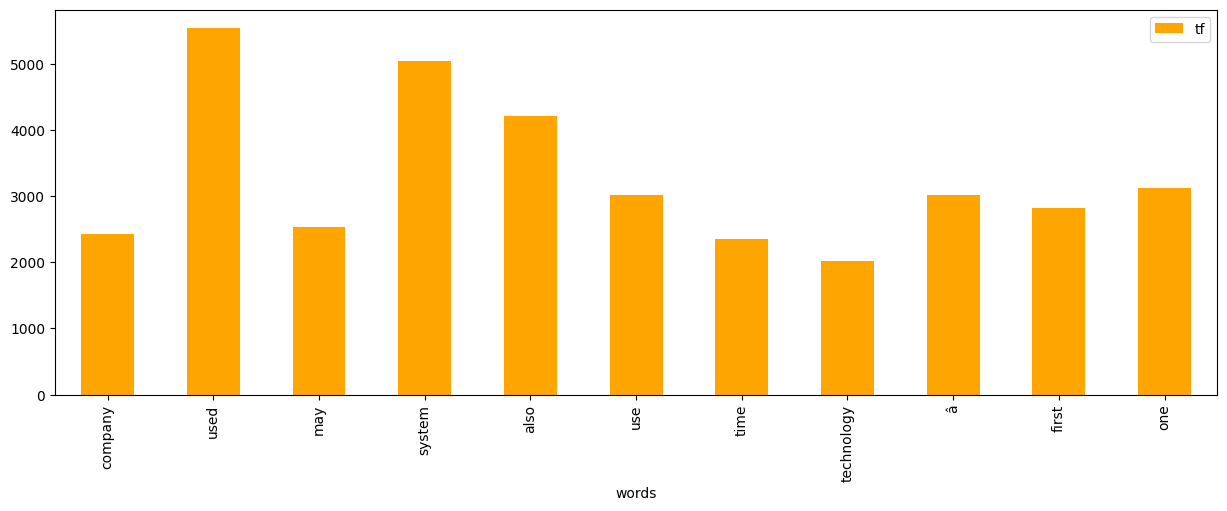

In [15]:
tf.columns = ['words', 'tf']
tf[tf['tf'] > 2000].plot.bar(x='words', y='tf', figsize=(15, 5), color='orange')
plt.show()

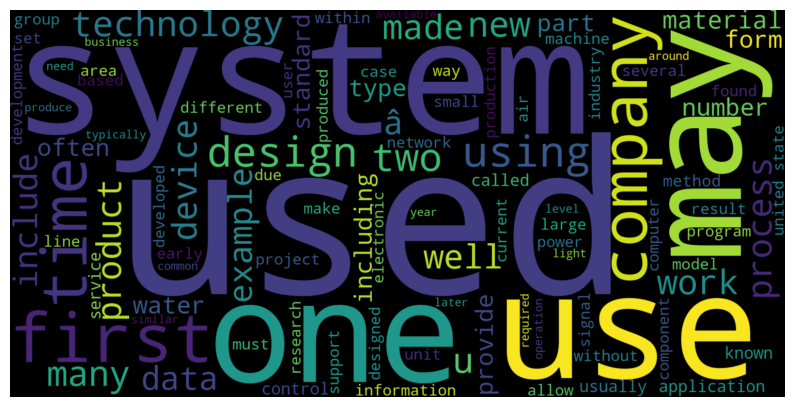

In [17]:
text = " ".join(i for i in df.text)
wordcloud = WordCloud(width=1600, 
                      height=800, 
                      max_words=100,
                      background_color="black").generate(text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [22]:
new_df = pd.read_csv("wiki_data.csv", index_col=0)
new_df = new_df[:2000]

In [24]:
def wiki_preprocess(text, barplot=False, wordcloud=False):
    text = text.str.lower()
    text = text.str.replace('[^\w\s]', '', regex=True)
    text = text.str.replace('\n', '', regex=True)
    text = text.str.replace('\d', '', regex=True)

    sw = stopwords.words('english')
    text = text.apply(lambda x: ' '.join(x for x in str(x).split() if x not in (sw)))

    rare = pd.Series(' '.join(text).split()).value_counts()[-1000:]
    text = text.apply(lambda x: ' '.join(x for x in x.split() if x not in rare))

    if barplot:
        tf = text.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
        tf.columns = ['words', 'tf']
        tf[tf['tf'] > 2000].plot.bar(x='words', y='tf', figsize=(15, 5), color='orange')
        plt.show()

    if wordcloud:
        txt = " ".join(i for i in text)
        wc = WordCloud(width=1600, 
                       height=800, 
                       max_words=100,
                       background_color="black").generate(txt)
        plt.figure(figsize=(10, 7))
        plt.imshow(wc, interpolation="bilinear")
        plt.axis('off')
        plt.show()
    
    return text

In [20]:
wiki_preprocess(new_df['text'])

1       formerly novo computer services company based ...
2       battery indicatora battery indicator also know...
3       bob allen pease august â â june analog integra...
4       secure military forum became operational april...
5       clidar scientific instrument used measuring pa...
                              ...                        
1996    edinburgh calotype edinburgh calotype club â c...
1997    endrinendrin chemical formula first produced s...
1998    ethylene glycol glycol dinitrate also known ch...
1999    forges de syamthe forges de syam syam forges f...
2000    frankkamenetskii theoryin combustion frankkame...
Name: text, Length: 2000, dtype: object

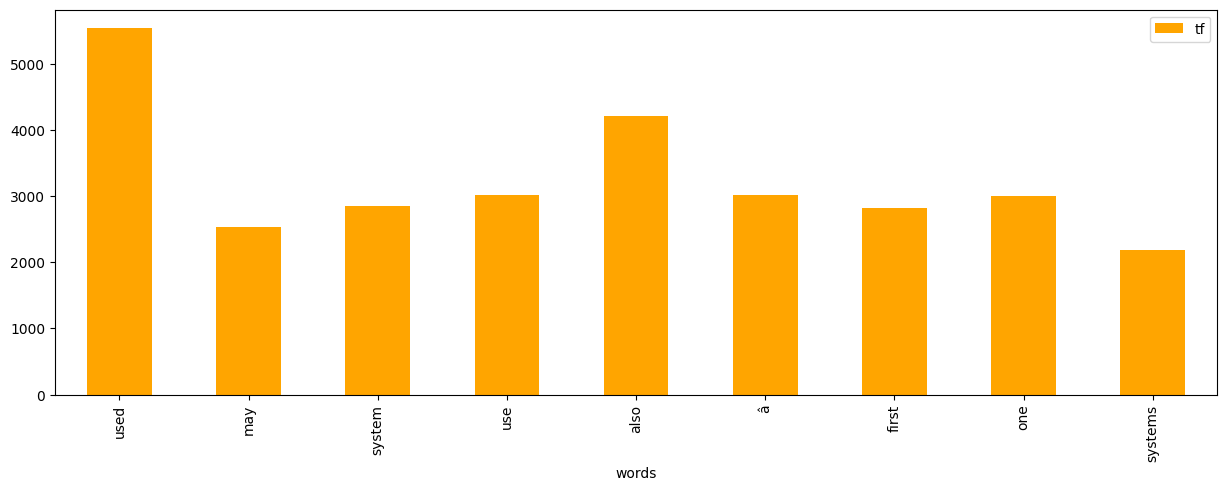

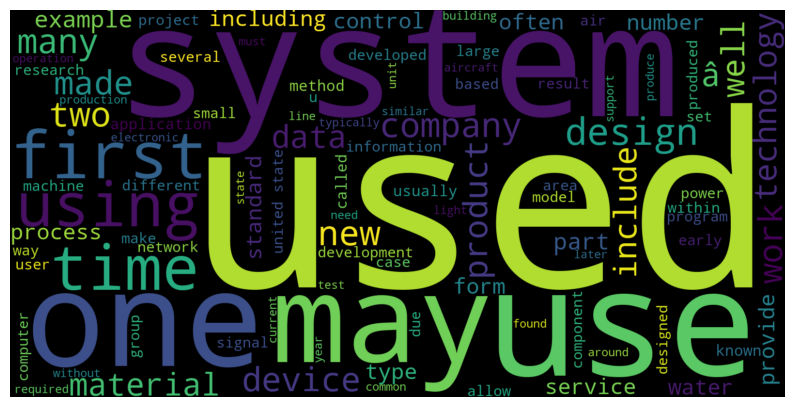

1       formerly novo computer services company based ...
2       battery indicatora battery indicator also know...
3       bob allen pease august â â june analog integra...
4       secure military forum became operational april...
5       clidar scientific instrument used measuring pa...
                              ...                        
1996    edinburgh calotype edinburgh calotype club â c...
1997    endrinendrin chemical formula first produced s...
1998    ethylene glycol glycol dinitrate also known ch...
1999    forges de syamthe forges de syam syam forges f...
2000    frankkamenetskii theoryin combustion frankkame...
Name: text, Length: 2000, dtype: object

In [25]:
wiki_preprocess(new_df['text'], barplot=True, wordcloud=True)